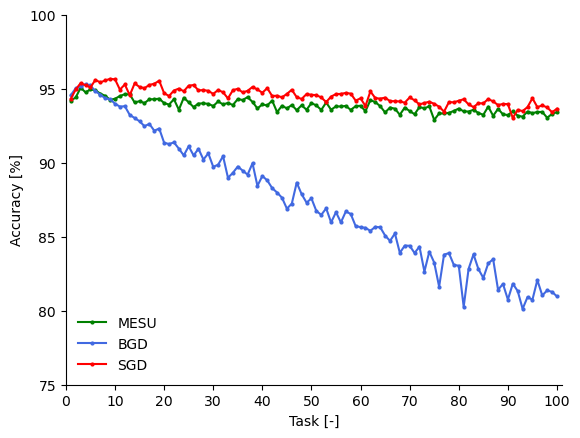

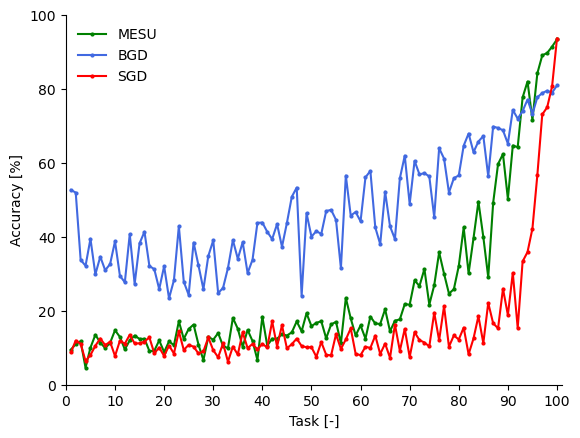

In [57]:
import torch
import os
import matplotlib.pyplot as plt

paths = [
    "./results/20241011-165155-MESU-BayesianNN-BS1-50-PermutedMNIST-relu/params-network-0/accuracy.pt",
    "./results/20241014-171352-BGD-BayesianNN-BS1-50-PermutedMNIST-relu/params-network-0/accuracy.pt",
    "./results/20241012-180731-SGD-DNN-BS1-50-PermutedMNIST-relu/params-network-0/accuracy.pt"
]
accuracies = []
for path in paths:
    accuracies.append(torch.load(path))

# We have a list of tensors 100x100 for 100 tasks and 100 accuracies per task.
# array[trained_task][task_accuracy]
legends = ["MESU", "BGD", "SGD"]
colors = ['green', 'royalblue', 'red']
fig, ax = plt.subplots()
for method, color in zip(accuracies, colors):
    # plot the accuracy for the trained_task at the current task
    x = range(1, 101)
    y = [method[task][task].cpu()*100 for task in range(100)]
    ax.plot(x, y, marker='o', markersize=2, color=color)
ax.set_ylim([75, 100])
ax.set_xlim([1, 101])
# set add label 1 in xticks
ax.set_xticks(range(0, 101, 10))
ax.set(xlabel='Task [-]', ylabel='Accuracy [%]')
ax.legend(frameon=False, loc='lower left', labels=legends)
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()   

# Second plot showing the accuracy on all tasks after training on all tasks
fig, ax = plt.subplots()
for method, color in zip(accuracies, colors):
    # plot the accuracy for the trained_task at the current task
    x = range(1, 101)
    y = [method[99][task].cpu()*100 for task in range(100)]
    ax.plot(x, y, marker='o', markersize=2, color=color)
ax.set_ylim([0, 100])
ax.set_xlim([1, 101])
# set add label 1 in xticks
ax.set_xticks(range(0, 101, 10))
ax.set(xlabel='Task [-]', ylabel='Accuracy [%]')
ax.legend(frameon=False, loc='upper left', labels=legends)
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


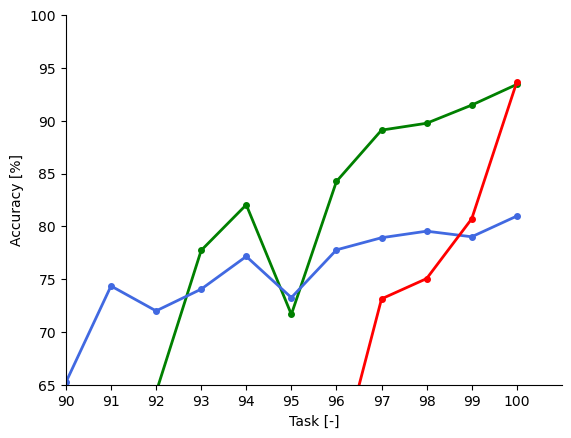

In [58]:
# Second plot showing the accuracy on all tasks after training on all tasks
fig, ax = plt.subplots()
for method, color in zip(accuracies, colors):
    # plot the accuracy for the trained_task at the current task
    x = range(1, 101)
    y = [method[99][task].cpu()*100 for task in range(100)]
    ax.plot(x, y, marker='o', markersize=4, color=color, linewidth=2)
ax.set_ylim([65, 100])
ax.set_xlim([90, 101])
# set add label 1 in xticks
ax.set_xticks(range(90, 101, 1))
ax.set(xlabel='Task [-]', ylabel='Accuracy [%]')
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

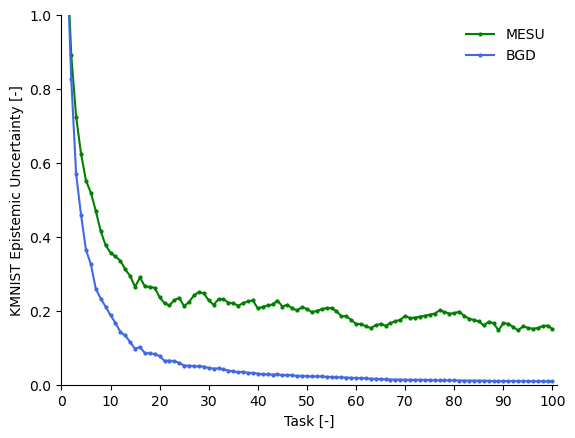

In [60]:
paths = [
    "./results/20241011-165155-MESU-BayesianNN-BS1-50-PermutedMNIST-relu/certainty/",
    "./results/20241014-171352-BGD-BayesianNN-BS1-50-PermutedMNIST-relu/certainty/",
]
epistemic_full = []
for path in paths:
    epistemic_alg = []
    # for all epistemic file in the path using os
    for file in os.listdir(path):
        if "ood-epi-certainty" in file and file.endswith(".pt"):
            name = os.path.join(path, file)
            epistemic_alg.append(torch.load(name))
    epistemic_full.append(epistemic_alg)

for algo in epistemic_full:
    for epoch in range(len(algo)):
        algo[epoch] = algo[epoch].sum(dim=0).mean()

fig, ax = plt.subplots()
for method, color in zip(epistemic_full, colors):
    x = range(1, 101)
    y = [method[task].cpu() for task in range(100)]
    ax.plot(x, y, marker='o', markersize=2, color=color)
ax.set_ylim([0, 1])
ax.set_xlim([1, 101])
# set add label 1 in xticks
ax.set_xticks(range(0, 101, 10))
ax.set(xlabel='Task [-]', ylabel='KMNIST Epistemic Uncertainty [-]')
ax.legend(frameon=False, loc='upper right', labels=legends)
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
    